In [ ]:
## Business Problem - Customer Churn Prediction

Customer churn refers to customers discontinuing a company’s service. 
Retaining existing customers is significantly more cost-effective than acquiring new ones, 
making churn prediction a critical business problem.

The objective of this project is to build a machine learning model that predicts whether a 
customer is likely to churn, enabling businesses to take proactive retention measures.



In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve

In [137]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, roc_auc_score

In [9]:
import pickle

In [10]:
#Data loading 

In [11]:
df = pd.read_csv("/Users/vicky/Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [13]:
df.shape

(7043, 21)

In [14]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [18]:
df = df.drop(columns=["customerID"]) 
# Cutomer ID column is not needed for the modelling so dropped

KeyError: "['customerID'] not found in axis"

In [17]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [25]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [40]:
# printing unique values for the categorical features

In [26]:
numerical_features_list = ["tenure", "MonthlyCharges", "TotalCharges"]

for col in df.columns:
    if col not in numerical_features_list:
        print(col,df[col].unique())
        print("-"*10)

gender ['Female' 'Male']
----------
SeniorCitizen [0 1]
----------
Partner ['Yes' 'No']
----------
Dependents ['No' 'Yes']
----------
PhoneService ['No' 'Yes']
----------
MultipleLines ['No phone service' 'No' 'Yes']
----------
InternetService ['DSL' 'Fiber optic' 'No']
----------
OnlineSecurity ['No' 'Yes' 'No internet service']
----------
OnlineBackup ['Yes' 'No' 'No internet service']
----------
DeviceProtection ['No' 'Yes' 'No internet service']
----------
TechSupport ['No' 'Yes' 'No internet service']
----------
StreamingTV ['No' 'Yes' 'No internet service']
----------
StreamingMovies ['No' 'Yes' 'No internet service']
----------
Contract ['Month-to-month' 'One year' 'Two year']
----------
PaperlessBilling ['Yes' 'No']
----------
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
----------
MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
----------
Churn ['No' 'Yes']
----------


In [27]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [28]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

ValueError: could not convert string to float: ' '

In [29]:
df[df["TotalCharges"] == " "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [39]:
#converting nullvalues to 0.0 and float type

In [30]:
df["TotalCharges"] = df["TotalCharges"].replace({" ":"0.0"}).astype(float)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [38]:
#checking class distribution of target column[churn]

In [134]:
df["Churn"].value_counts()
df["Churn"].value_counts(normalize=True)

Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64

In [ ]:
"""
The target variable is imbalanced, with significantly fewer churned customers.
This makes accuracy an unreliable metric on its own.
"""

In [37]:
#########Exploratory Data Analysis

In [42]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [41]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [48]:
def plot_histogram(df, column_name):
    plt.figure(figsize = (5,3))
    sns.histplot(df[column_name], kde =True)
    plt.title(f"Distribution of {column_name}")
    
    col_mean = df[column_name].mean()
    col_median = df[column_name].median()
    
    plt.axvline(col_mean,color="red",linestyle ="--",label = "mean")
    plt.axvline(col_median,color="green",linestyle ="-",label = "median")
    
    plt.legend()
    plt.show()

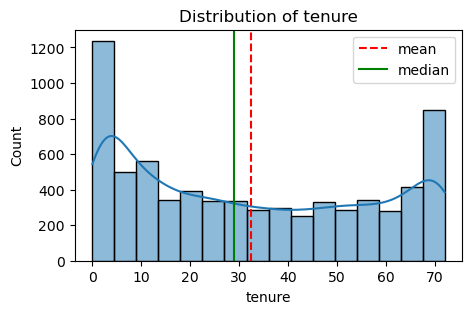

In [49]:
plot_histogram(df,"tenure")

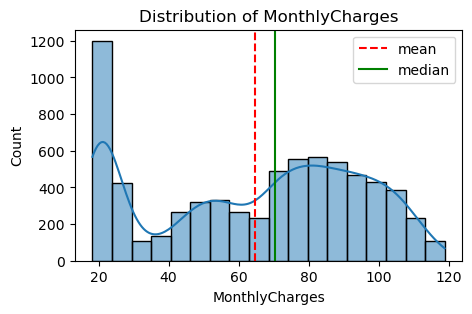

In [50]:
plot_histogram(df,"MonthlyCharges")

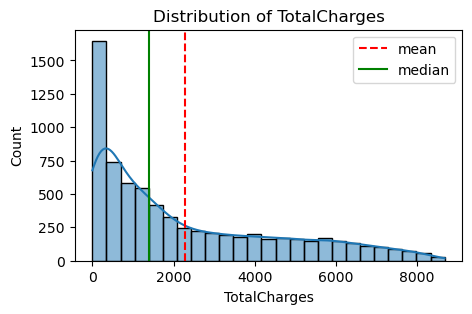

In [51]:
plot_histogram(df,"TotalCharges")

In [53]:
def plot_boxplot(df,column_name):
    plt.figure(figsize=(5,3))
    sns.boxplot(y=df[column_name])
    plt.title(f"Box plot of {column_name}")
    plt.ylabel(column_name)
    plt.show()

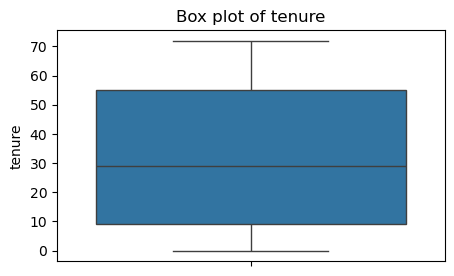

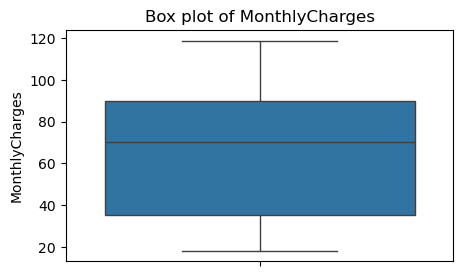

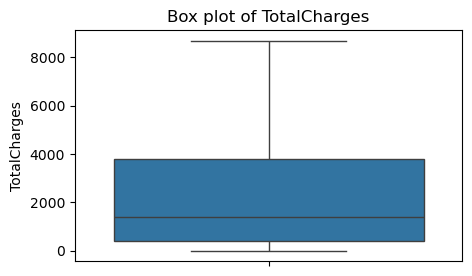

In [54]:
plot_boxplot(df,"tenure")
plot_boxplot(df,"MonthlyCharges")
plot_boxplot(df,"TotalCharges")

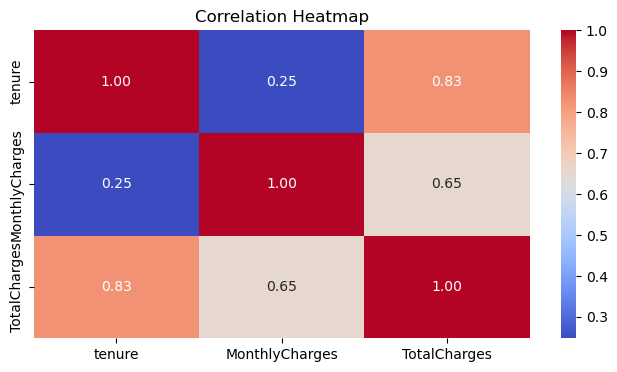

In [55]:
plt.figure(figsize = (8,4))
sns.heatmap(df[["tenure","MonthlyCharges","TotalCharges"]].corr(), annot = True, cmap = "coolwarm",
            fmt = ".2f")
plt.title("Correlation Heatmap")
plt.show()

In [56]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

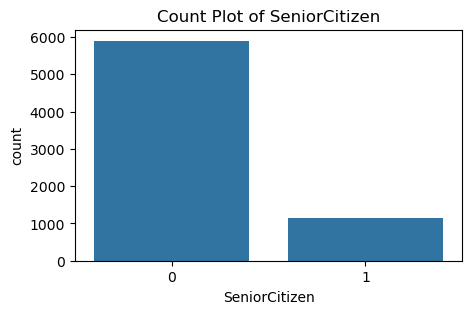

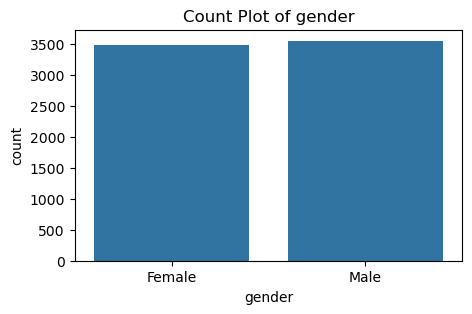

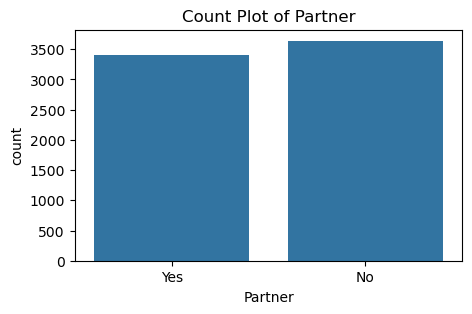

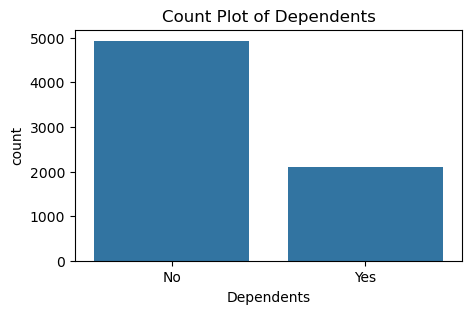

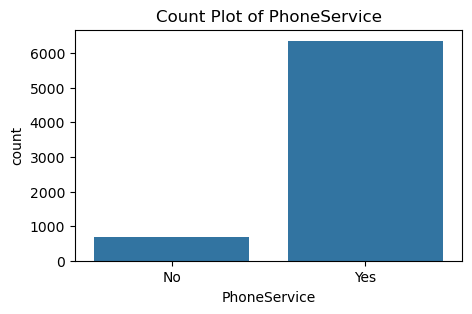

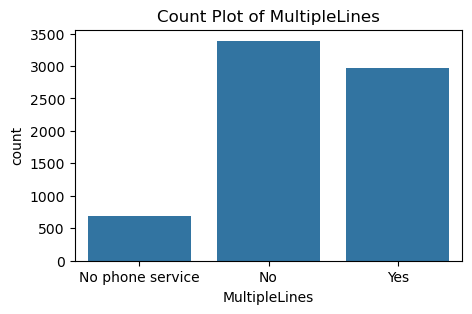

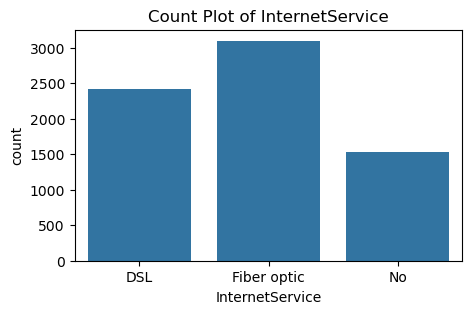

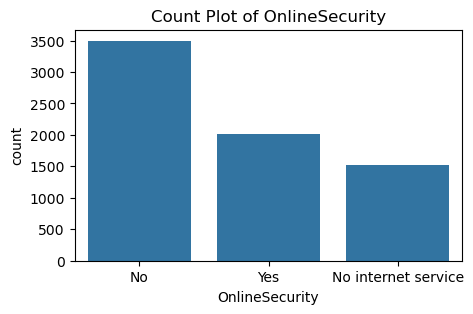

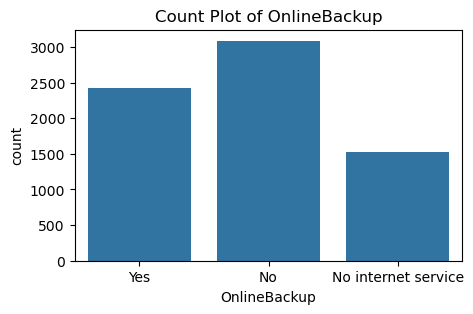

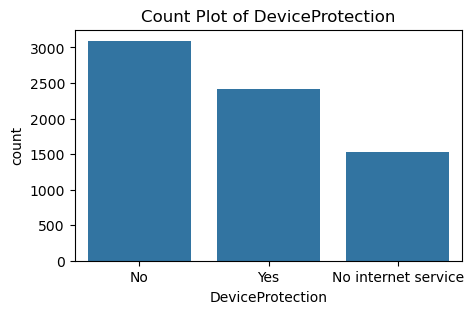

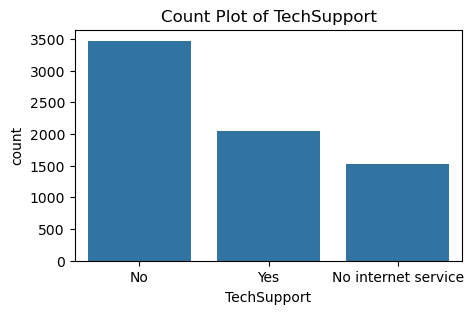

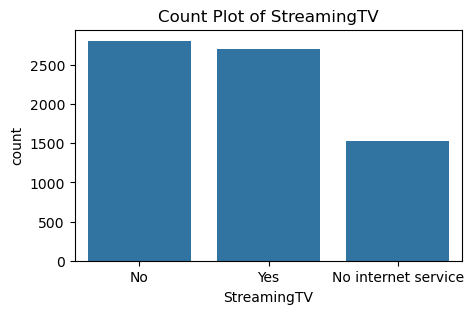

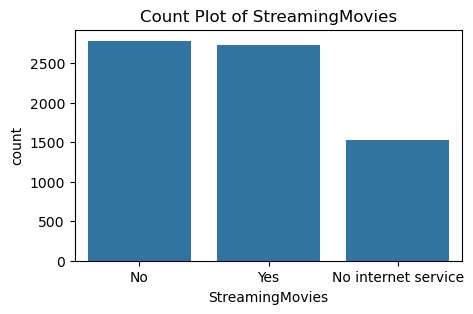

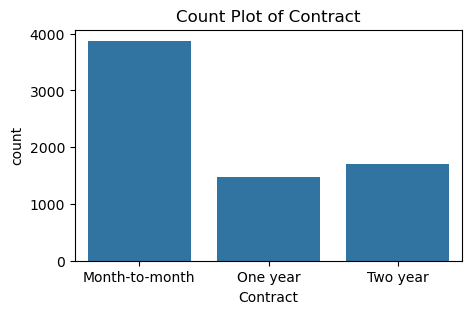

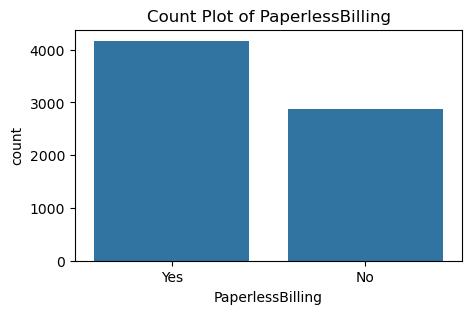

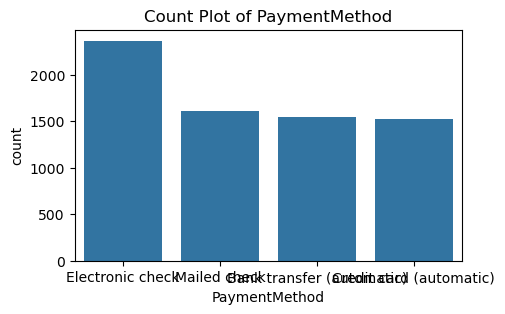

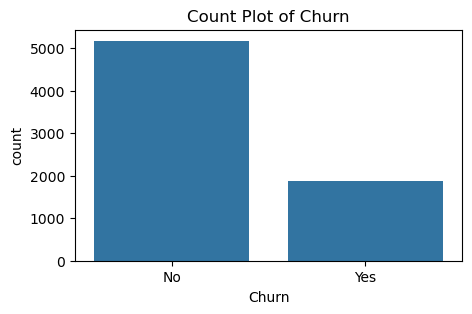

In [62]:
object_cols = df.select_dtypes(include = "object").columns.to_list()

object_cols = ['SeniorCitizen'] + object_cols

for col in object_cols:
    plt.figure(figsize=(5,3))
    sns.countplot(x=df[col])
    plt.title(f"Count Plot of {col}")
    plt.show()

In [63]:
####### Data Preprocessing

In [64]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [65]:
df["Churn"]  =df["Churn"].replace({"Yes":1,"No":0})

/var/folders/62/7myxtkvd14ngjj8tnc9rfmkr0000gn/T/ipykernel_47860/1794353101.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Churn"]  =df["Churn"].replace({"Yes":1,"No":0})


In [69]:
df["Churn"].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [ ]:
# Using Label Encoding 

In [70]:
Object_columns = df.select_dtypes(include ="object").columns

In [71]:
Object_columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [ ]:
# Encoding categorical variables for ML compatibility

In [72]:
encoders = {}

for column in Object_columns:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
    encoders[column] = label_encoder
    
    
#save the encoders in a pickle file
with open("encoders.pkl","wb") as f:
    pickle.dump(encoders,f)
    
    

In [ ]:

Feature engineering is performed to capture customer loyalty and 
spending behavior more effectively.


In [136]:
df['Tenure_Group'] = pd.cut(
    df['tenure'],
    bins=[0, 6, 12, 24, 60],
    labels=[0, 1, 2, 3]
)

df['Charges_Ratio'] = df['MonthlyCharges'] / (df['TotalCharges'] + 1)

In [73]:
###### Training and Test data split

In [79]:
#splitting features and target
X = df.drop(columns =["Churn"])

In [80]:
y = df["Churn"]

In [81]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [82]:
y_train.shape

(5634,)

In [83]:
y_train.value_counts()

Churn
0    4138
1    1496
Name: count, dtype: int64

In [ ]:

The dataset exhibits class imbalance, with churned customers forming a minority.
SMOTE (Synthetic Minority Over-sampling Technique) was applied 
to generate synthetic samples and prevent bias toward the majority class 
while avoiding data leakage.


In [84]:
### Using SMOTE here

In [85]:
smote = SMOTE(random_state = 42)

In [86]:
X_train_smote,y_train_smote = smote.fit_resample(X_train,y_train)

In [89]:
y_train_smote.value_counts()

Churn
0    4138
1    4138
Name: count, dtype: int64

In [90]:
######## Model Training

In [91]:
# Training with default Hyperparameters

In [96]:
models = {
    "Decision Tree":DecisionTreeClassifier(random_state = 42),
    "Random Forest":RandomForestClassifier(random_state = 42),
    "XGBoost" : XGBClassifier(random_state = 42)
}

In [101]:
#dictionary to store the cross validation results
cv_scores = {}

# perform 5-fold cross validation for each model
for model_name, model in models.items():
    print(f"Training {model_name} with default parameters")
    scores = cross_val_score(model,X_train_smote,y_train_smote, cv=5, scoring="accuracy")
    cv_scores[model_name] = scores
    print(f"{model_name} cross-validation accuracy: {np.mean(scores):.2f}")
    print("-"*50)      


Training Decision Tree with default parameters
Decision Tree cross-validation accuracy: 0.78
--------------------------------------------------
Training Random Forest with default parameters
Random Forest cross-validation accuracy: 0.84
--------------------------------------------------
Training XGBoost with default parameters
XGBoost cross-validation accuracy: 0.83
--------------------------------------------------


In [102]:
cv_scores

{'Decision Tree': array([0.68055556, 0.71903323, 0.81752266, 0.84350453, 0.84048338]),
 'Random Forest': array([0.72826087, 0.77220544, 0.90453172, 0.89305136, 0.90030211]),
 'XGBoost': array([0.71074879, 0.75226586, 0.90271903, 0.89123867, 0.89909366])}

In [103]:
##### Random Forest gives the highest accuracy compared to other models with default parameters.

In [104]:
rfc = RandomForestClassifier(random_state = 42)

In [109]:
rfc.fit(X_train_smote,y_train_smote)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [110]:
y_test.value_counts()

Churn
0    1036
1     373
Name: count, dtype: int64

In [106]:
######## Model Evaluation

In [139]:
# evaluate on test data
y_test_pre = rfc.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]


print("Accuracy Score:\n",accuracy_score(y_test,y_test_pre))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_test_pre))
print("Classification Report:\n",classification_report(y_test,y_test_pre))
print("ROC-AUC Score:\n",roc_auc_score(y_test, y_proba))

Accuracy Score:
 0.7821149751596878
Confusion Matrix:
 [[886 150]
 [157 216]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.85      1036
           1       0.59      0.58      0.58       373

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409

ROC-AUC Score:
 0.8266391151779893


In [ ]:

ROC-AUC was used to evaluate the model’s ability to distinguish between churned and 
retained customers across all classification thresholds.


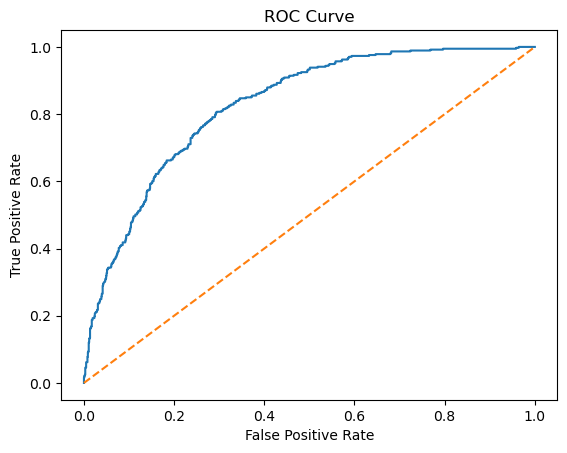

In [141]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()


In [ ]:
### Model Performance Summary

The model achieves 78% accuracy, while correctly identifying 58% of churned customers.
Since churn prediction focuses on identifying at-risk customers, recall and ROC-AUC were prioritized over accuracy.

The ROC-AUC score of 0.83 indicates strong discriminative power between churned and retained customers.

SMOTE was applied only on the training data to address class imbalance while preventing data leakage during evaluation.


In [118]:
# save the trained model as a pickle file 
model_data = {"model":rfc,"features_name":X.columns.tolist()}

with open("customer_churn_model.pkl","wb") as f:
    pickle.dump(model_data, f)

In [119]:
####### Loading the save model and build a predictive system

In [120]:
with open("customer_churn_model.pkl", "rb") as f:
    model_data = pickle.load(f)
    
    loaded_model = model_data["model"]
    features_name = model_data["features_name"]

In [121]:
print(loaded_model)

RandomForestClassifier(random_state=42)


In [123]:
print(features_name)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [133]:
input_data = {
    "gender": "Female",
    "SeniorCitizen": 0,
    "Partner": "Yes",
    "Dependents": "No",
    "tenure": 1,
    "PhoneService": "No",
    "MultipleLines": "No phone service",
    "InternetService": "DSL",
    "OnlineSecurity": "No",
    "OnlineBackup": "Yes",
    "DeviceProtection": "No",
    "TechSupport": "No",
    "StreamingTV": "No",
    "StreamingMovies": "No",
    "Contract": "Month-to-month",
    "PaperlessBilling": "Yes",
    "PaymentMethod": "Electronic check",
    "MonthlyCharges": 29.85,
    "TotalCharges": 29.85,
}

input_data_df = pd.DataFrame([input_data])

with open("encoders.pkl", "rb") as f:
    encoders = pickle.load(f)
    
#encode the categorical features using the saved encoders
for column, encoder in encoders.items():
    input_data_df[column] = encoder.transform(input_data_df[column])
    
# Prediction
prediction = loaded_model.predict(input_data_df)
prediction_prob = loaded_model.predict_proba(input_data_df)

print(prediction)

#results
print(f"Prediction: {'Churn' if prediction[0] == 1 else 'No Churn'}")
print(f"Precition probabbility: {prediction_prob}")

[0]
Prediction: No Churn
Precition probabbility: [[0.83 0.17]]


In [ ]:
### Sample Prediction Output

Above is an example prediction for a single customer record:

- Prediction: No Churn  
- Churn Probability: 17%

This probabilistic output enables business teams to define custom thresholds and 
prioritize customer retention strategies accordingly.
